In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df = pd.read_csv('delhi_aqi_cleaned.csv')

In [116]:
df.head()

,date,AQI
0,2020-11-25 01:00:00,446.170241
1,2020-11-25 02:00:00,468.574458
2,2020-11-25 03:00:00,485.559518
3,2020-11-25 04:00:00,482.032892
4,2020-11-25 05:00:00,479.380964


In [117]:
df['date'] = pd.to_datetime(df['date'])

In [118]:
df.fillna(method='ffill',inplace=True)

In [119]:
df.isnull().sum()

date    0
AQI     0
dtype: int64

In [120]:
df.set_index('date',inplace=True)

In [121]:
df = df.asfreq('h')

In [122]:
df.head()

,AQI
date,
2020-11-25 01:00:00,446.170241
2020-11-25 02:00:00,468.574458
2020-11-25 03:00:00,485.559518
2020-11-25 04:00:00,482.032892
2020-11-25 05:00:00,479.380964


In [123]:
import matplotlib.dates as mdates

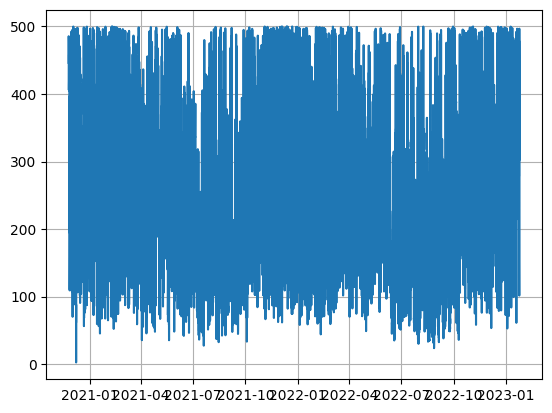

In [124]:
plt.plot(df.index,df['AQI'])
plt.grid()

(array([18628., 18718., 18809., 18901., 18993., 19083., 19174., 19266.,
        19358.]),
 [Text(18628.0, 0, '2021-01'),
  Text(18718.0, 0, '2021-04'),
  Text(18809.0, 0, '2021-07'),
  Text(18901.0, 0, '2021-10'),
  Text(18993.0, 0, '2022-01'),
  Text(19083.0, 0, '2022-04'),
  Text(19174.0, 0, '2022-07'),
  Text(19266.0, 0, '2022-10'),
  Text(19358.0, 0, '2023-01')])

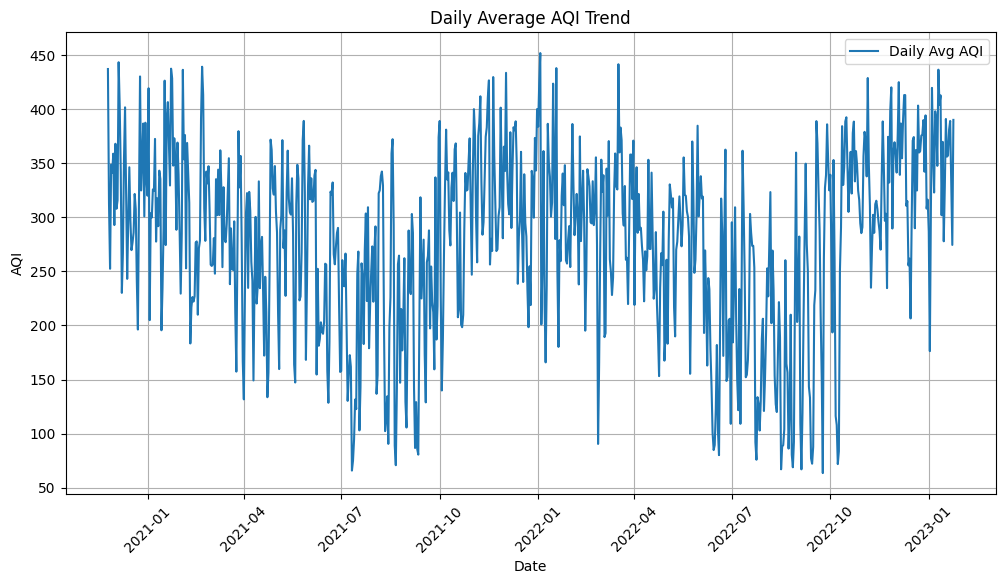

In [125]:
df_resampled = df['AQI'].resample('D').mean()
plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled, label='Daily Avg AQI')

plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Daily Average AQI Trend')
plt.legend()
plt.grid()
plt.xticks(rotation=45)

(array([18628., 18718., 18809., 18901., 18993., 19083., 19174., 19266.,
        19358.]),
 [Text(18628.0, 0, '2021-01'),
  Text(18718.0, 0, '2021-04'),
  Text(18809.0, 0, '2021-07'),
  Text(18901.0, 0, '2021-10'),
  Text(18993.0, 0, '2022-01'),
  Text(19083.0, 0, '2022-04'),
  Text(19174.0, 0, '2022-07'),
  Text(19266.0, 0, '2022-10'),
  Text(19358.0, 0, '2023-01')])

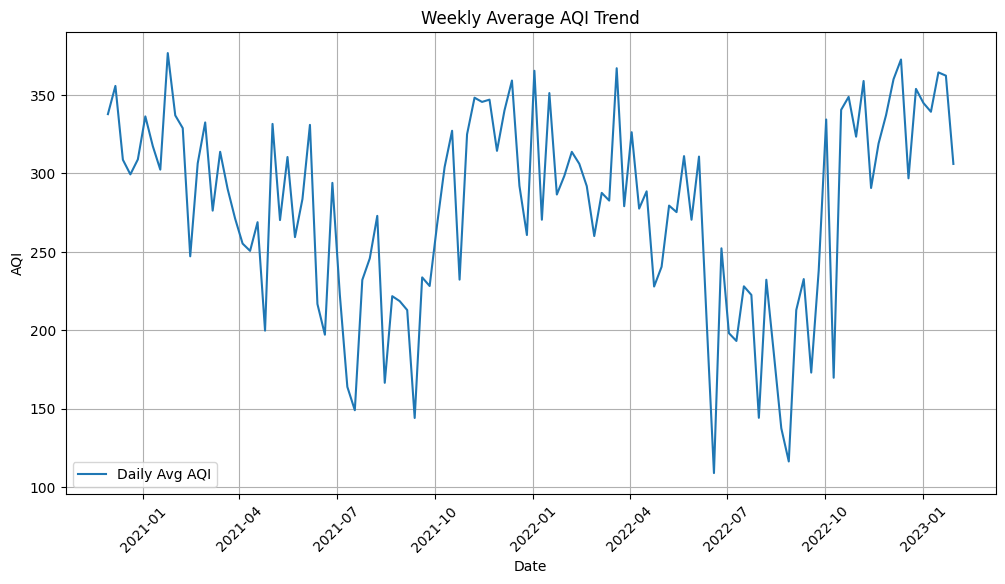

In [126]:
df_resampled = df['AQI'].resample('W').mean()
plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled, label='Daily Avg AQI')

plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Weekly Average AQI Trend')
plt.legend()
plt.grid()
plt.xticks(rotation=45)

In [127]:
from statsmodels.tsa.stattools import adfuller

In [128]:
def check_stationarity(timeseries):
    rolmean = timeseries.rolling(window=24).mean()
    rolstd = timeseries.rolling(window=24).std()

    plt.figure(figsize=(10,5))
    plt.plot(timeseries, label='Original')
    plt.plot(rolmean, label='Rolling Mean', color='red')
    plt.plot(rolstd, label='Rolling Std Dev', color='black')
    plt.legend()
    plt.show()

In [129]:
df_resampled = pd.DataFrame(df_resampled)

In [130]:
df_resampled.head()

,AQI
date,
2020-11-29,337.858190
2020-12-06,355.862267
2020-12-13,308.740284
2020-12-20,299.403434
2020-12-27,308.966008


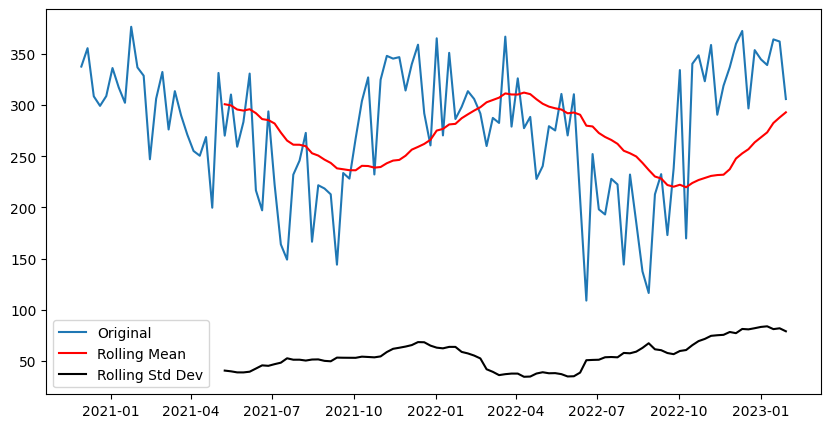

In [131]:
check_stationarity(df_resampled['AQI'])

In [132]:
adf_test = adfuller(df['AQI'])
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

ADF Statistic: -11.758336991259776
p-value: 1.164057465910338e-21


In [133]:
df['AQI_diff'] = df['AQI'].diff().dropna()

In [134]:
df.head()

,AQI,AQI_diff
date,,
2020-11-25 01:00:00,446.170241,NaN
2020-11-25 02:00:00,468.574458,22.404217
2020-11-25 03:00:00,485.559518,16.985060
2020-11-25 04:00:00,482.032892,-3.526627
2020-11-25 05:00:00,479.380964,-2.651928


In [135]:
df.drop('AQI_diff',inplace=True,axis=1)

In [136]:
df.head()

,AQI
date,
2020-11-25 01:00:00,446.170241
2020-11-25 02:00:00,468.574458
2020-11-25 03:00:00,485.559518
2020-11-25 04:00:00,482.032892
2020-11-25 05:00:00,479.380964


In [137]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

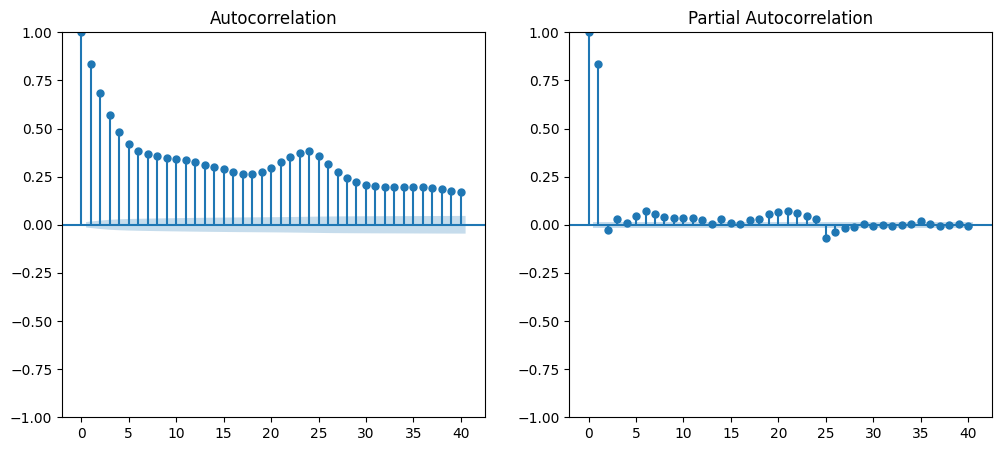

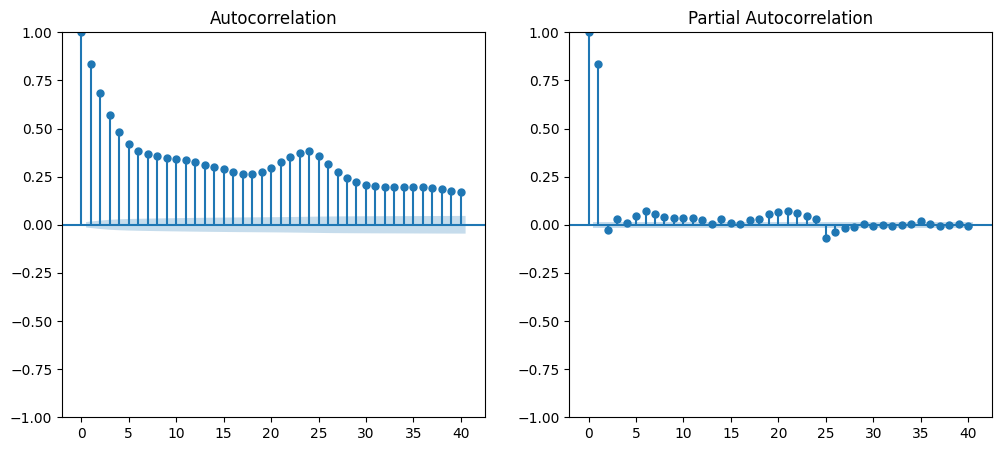

In [138]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plot_acf(df['AQI'], lags=40, ax=plt.gca())

plt.subplot(122)
plot_pacf(df['AQI'], lags=40, ax=plt.gca())

In [139]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA(1,0,0)
model_100 = ARIMA(df['AQI'], order=(1, 0, 0))
result_100 = model_100.fit()
print(result_100.summary())

                               SARIMAX Results                                
Dep. Variable:                    AQI   No. Observations:                18968
Model:                 ARIMA(1, 0, 0)   Log Likelihood             -107524.331
Date:                Wed, 09 Apr 2025   AIC                         215054.663
Time:                        22:35:58   BIC                         215078.214
Sample:                    11-25-2020   HQIC                        215062.388
                         - 01-24-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        277.4229      3.099     89.515      0.000     271.349     283.497
ar.L1          0.8327      0.007    115.809      0.000       0.819       0.847
sigma2      4912.1413     45.023    109.103      0.0

In [140]:
# ARIMA(1,0,1)
model_101 = ARIMA(df['AQI'], order=(1, 0, 1))
result_101 = model_101.fit()
print(result_101.summary())

                               SARIMAX Results                                
Dep. Variable:                    AQI   No. Observations:                18968
Model:                 ARIMA(1, 0, 1)   Log Likelihood             -107516.571
Date:                Wed, 09 Apr 2025   AIC                         215041.142
Time:                        22:36:01   BIC                         215072.544
Sample:                    11-25-2020   HQIC                        215051.442
                         - 01-24-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        277.4229      3.025     91.713      0.000     271.494     283.352
ar.L1          0.8218      0.008    103.885      0.000       0.806       0.837
ma.L1          0.0355      0.007      4.969      0.0

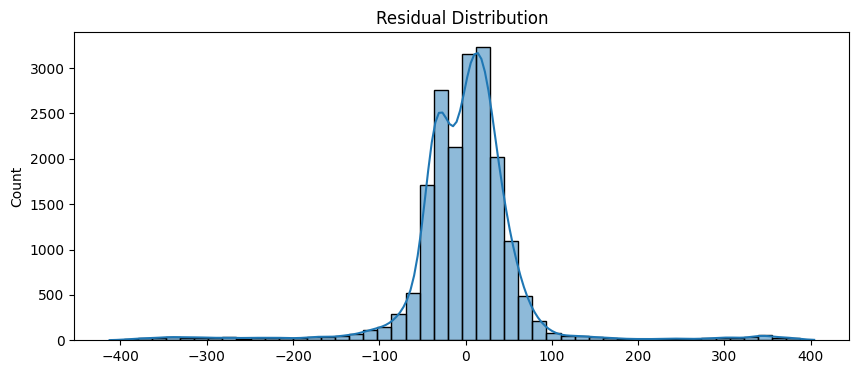

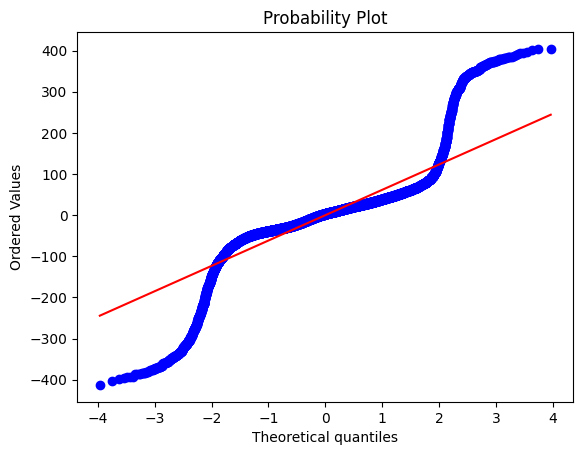

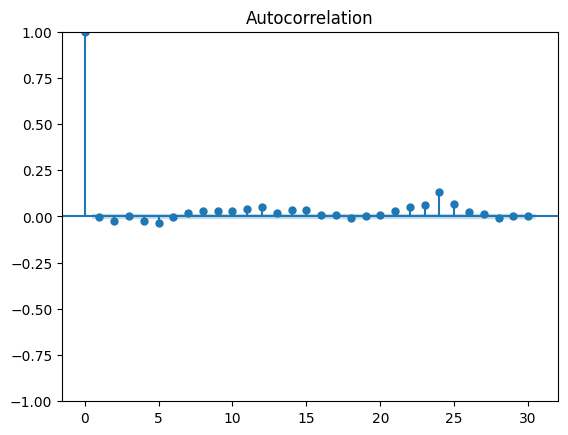

In [141]:
residuals = result_101.resid

# Histogram of residuals
plt.figure(figsize=(10, 4))
sns.histplot(residuals, bins=50, kde=True)
plt.title("Residual Distribution")
plt.show()

# Q-Q Plot
import scipy.stats as stats
import pylab

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

# ACF plot of residuals
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, lags=30)
plt.show()


In [142]:
df['AQI_log'] = np.log(df['AQI'])
model_log = ARIMA(df['AQI_log'], order=(1, 0, 1))
result_log = model_log.fit()
print(result_log.summary())

                               SARIMAX Results                                
Dep. Variable:                AQI_log   No. Observations:                18968
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -3970.336
Date:                Wed, 09 Apr 2025   AIC                           7948.671
Time:                        22:36:06   BIC                           7980.073
Sample:                    11-25-2020   HQIC                          7958.971
                         - 01-24-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4831      0.017    327.299      0.000       5.450       5.516
ar.L1          0.8510      0.005    168.200      0.000       0.841       0.861
ma.L1          0.0386      0.006      6.727      0.0

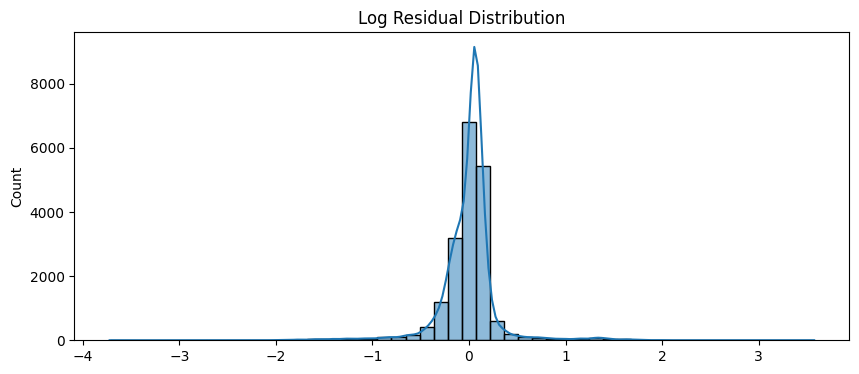

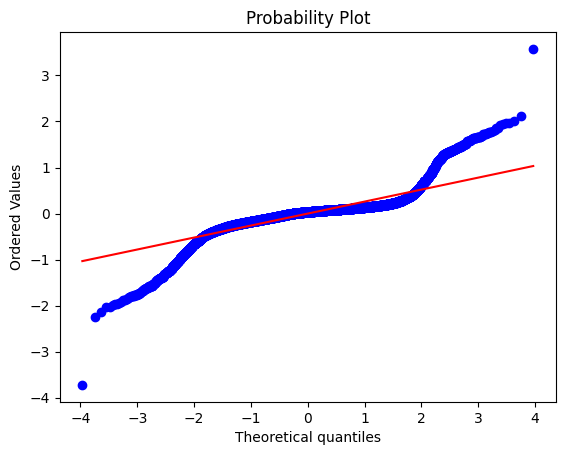

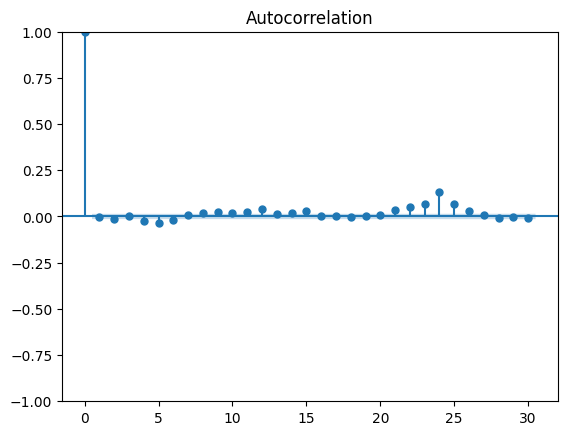

In [143]:
residuals_log = result_log.resid

plt.figure(figsize=(10, 4))
sns.histplot(residuals_log, bins=50, kde=True)
plt.title("Log Residual Distribution")
plt.show()

stats.probplot(residuals_log, dist="norm", plot=pylab)
pylab.show()

plot_acf(residuals_log, lags=30)
plt.show()

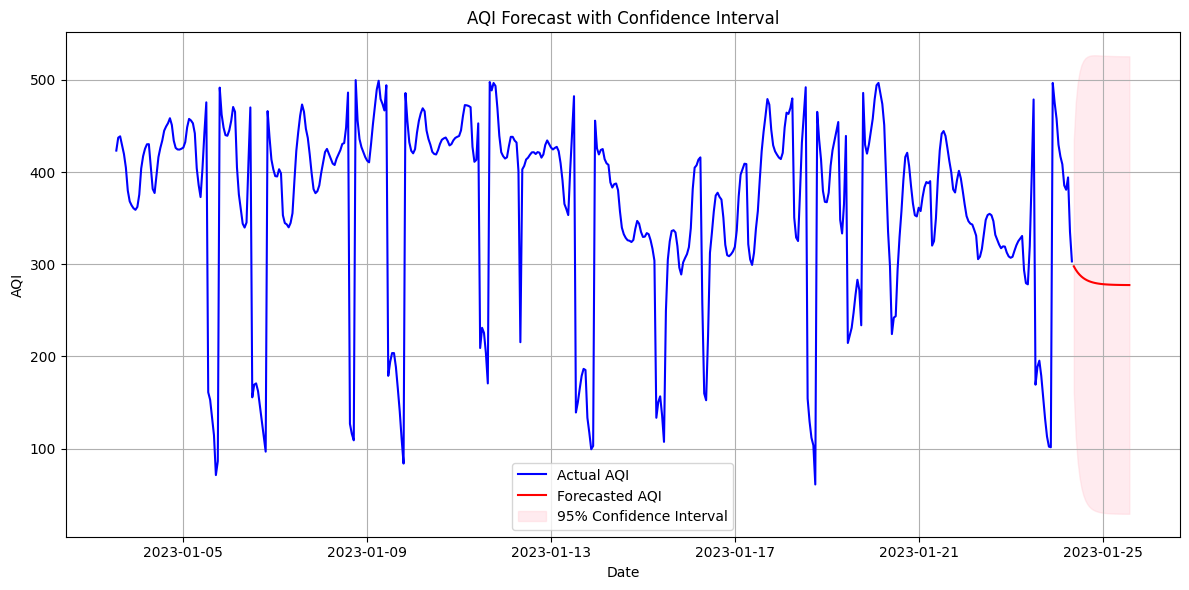

In [144]:
# Forecast for next 30 days
forecast_steps = 30
forecast = result_101.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int() 

plt.figure(figsize=(12, 6))

plt.plot(df.index[-500:], df['AQI'].iloc[-500:], label='Actual AQI', color='blue')

plt.plot(forecast_mean.index, forecast_mean, label='Forecasted AQI', color='red')

plt.fill_between(
    forecast_mean.index,
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    color='pink',
    alpha=0.3,
    label='95% Confidence Interval'
)

plt.title("AQI Forecast with Confidence Interval")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [145]:
rmse = np.sqrt(mean_squared_error(log_aqi, result_log.fittedvalues))
print("RMSE:", rmse)

RMSE: 0.298324673456975


In [146]:
mape = np.mean(np.abs((log_aqi - result_log.fittedvalues) / log_aqi)) * 100
print("MAPE:", mape, "%")

MAPE: 3.27405612552401 %


In [147]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [148]:
len(df)

18968

In [149]:
log_aqi = np.log(df['AQI'].iloc[-2000:])

In [150]:
model = SARIMAX(
    log_aqi,
    order=(1, 0, 1),               
    seasonal_order=(1, 1, 1, 24), 
    enforce_stationarity=False,
    enforce_invertibility=False
)

In [151]:
result_sarima = model.fit(disp=False)

In [152]:
forecast_steps = 30
forecast_sarima = result_sarima.get_forecast(steps=forecast_steps)
forecast_mean_sarima = np.exp(forecast_sarima.predicted_mean)
forecast_ci_sarima = np.exp(forecast_sarima.conf_int())

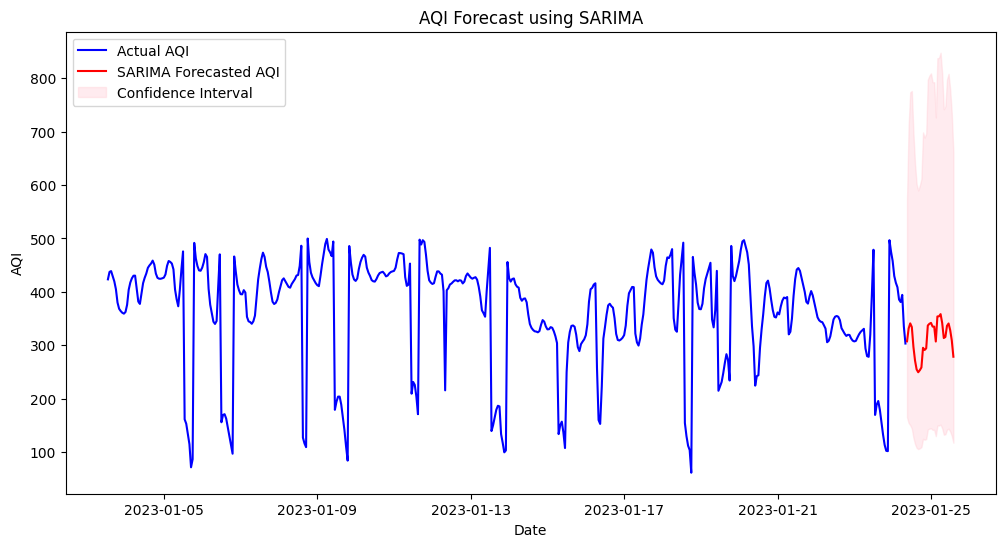

In [153]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[-500:], df['AQI'].iloc[-500:], label='Actual AQI', color='blue')
plt.plot(forecast_mean_sarima.index, forecast_mean_sarima, label='SARIMA Forecasted AQI', color='red')
plt.fill_between(forecast_ci_sarima.index,
                 forecast_ci_sarima.iloc[:, 0],
                 forecast_ci_sarima.iloc[:, 1],
                 color='pink', alpha=0.3, label='Confidence Interval')
plt.title("AQI Forecast using SARIMA")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.legend()
plt.show()

In [154]:
rmse = np.sqrt(mean_squared_error(log_aqi, result_sarima.fittedvalues))
print("RMSE:", rmse)

RMSE: 0.47679208362935777


In [155]:
mape = np.mean(np.abs((log_aqi - result_sarima.fittedvalues) / log_aqi)) * 100
print("MAPE:", mape, "%")

MAPE: 4.216703212553781 %


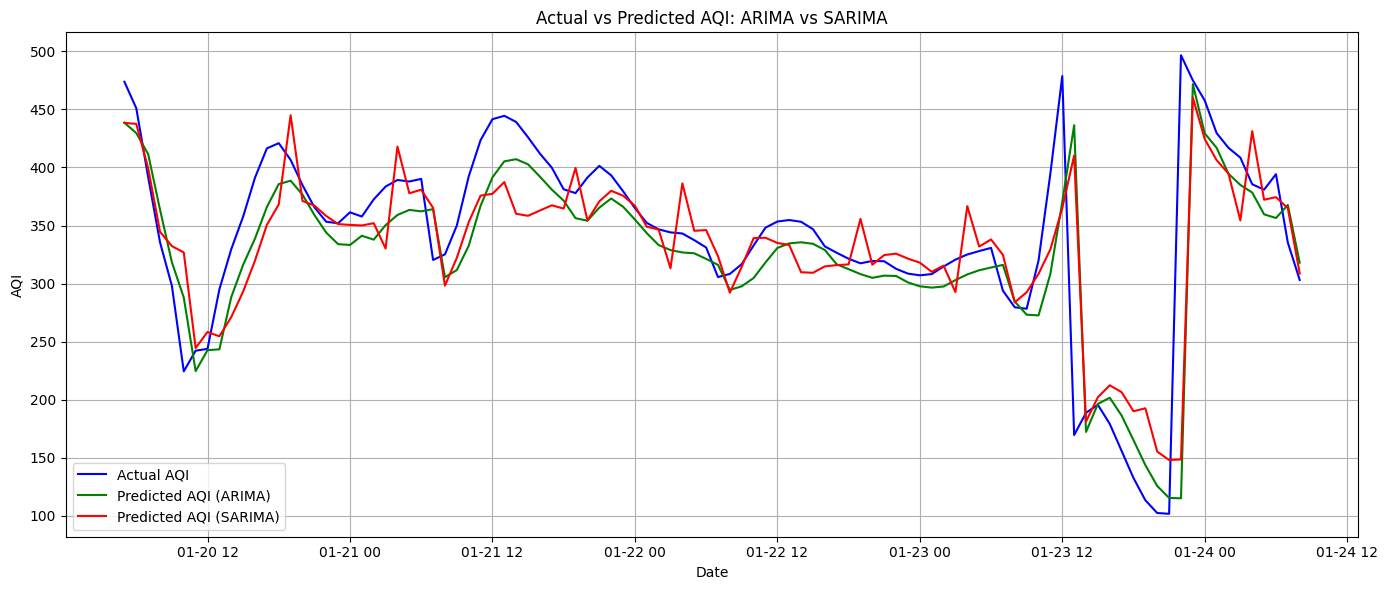

In [156]:
import matplotlib.pyplot as plt
import numpy as np

actual_aqi = df['AQI'].iloc[-100:]

pred_arima = np.exp(result_log.fittedvalues)

pred_sarima = np.exp(result_sarima.fittedvalues)

common_index = actual_aqi.index.intersection(pred_arima.index).intersection(pred_sarima.index)

plt.figure(figsize=(14, 6))
plt.plot(actual_aqi.loc[common_index], label='Actual AQI', color='blue')
plt.plot(pred_arima.loc[common_index], label='Predicted AQI (ARIMA)', color='green')
plt.plot(pred_sarima.loc[common_index], label='Predicted AQI (SARIMA)', color='red')
plt.title("Actual vs Predicted AQI: ARIMA vs SARIMA")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()